In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [138]:
df=pd.read_csv('bank.csv')

In [139]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [140]:
data=df.copy()

### Exploratory data analysis(EDA)

In [142]:
df.shape

(11162, 17)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [144]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### checking for null values

In [146]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

##### There are no null values in our data

### Checking for distribution of our target variable

In [149]:
df['deposit'].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

In [150]:
df['deposit'].value_counts(normalize=True)

deposit
no     0.52616
yes    0.47384
Name: proportion, dtype: float64

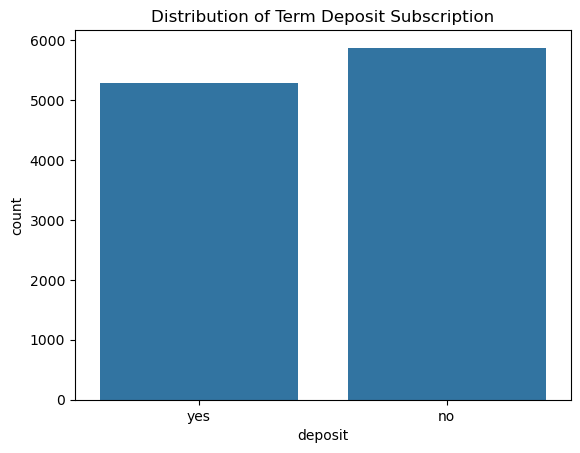

In [151]:
sns.countplot(data=df, x='deposit')
plt.title("Distribution of Term Deposit Subscription")
plt.show()

In [152]:
correl=df.corr(numeric_only=True)

<Axes: >

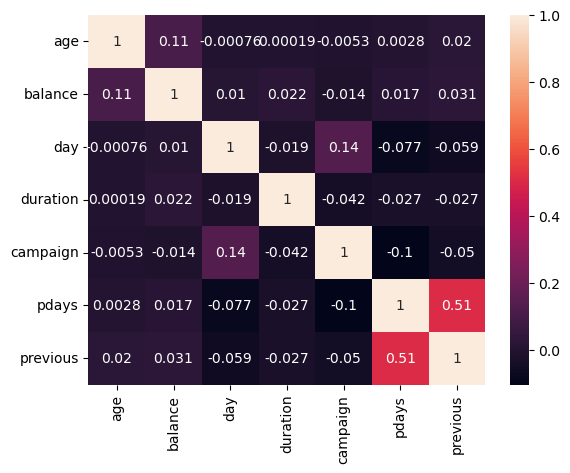

In [153]:
sns.heatmap(correl,annot=True)

#### This is the only moderate positive correlation in the dataset.pdays (number of days since the client was last contacted) and previous (number of previous contacts) are related, which makes sense.If a customer was contacted recently (pdays is low), they likely have had previous contacts.

<Figure size 1200x600 with 0 Axes>

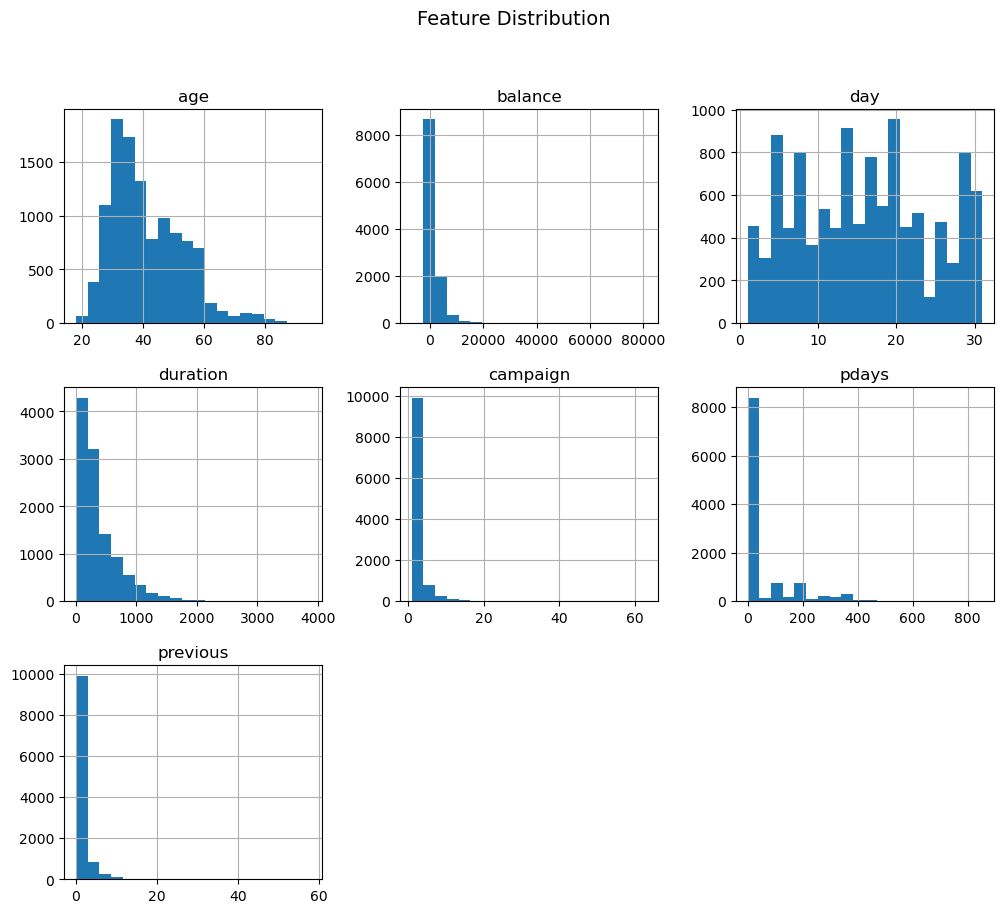

In [155]:
plt.figure(figsize=(12, 6))
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Feature Distribution", fontsize=14)
plt.show()

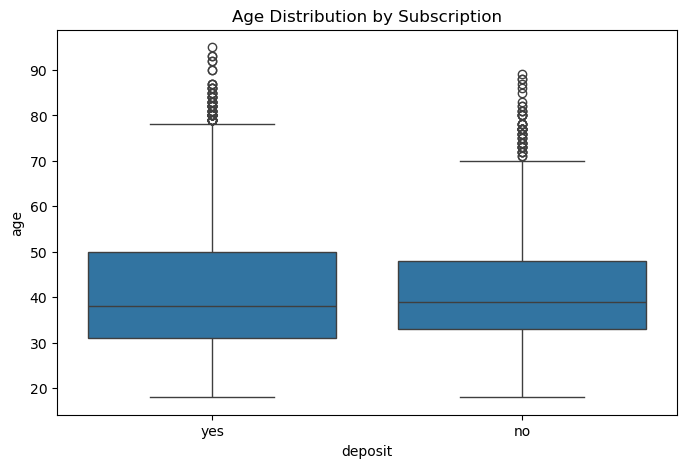

In [156]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="deposit", y="age", data=df)
plt.title("Age Distribution by Subscription")
plt.show()

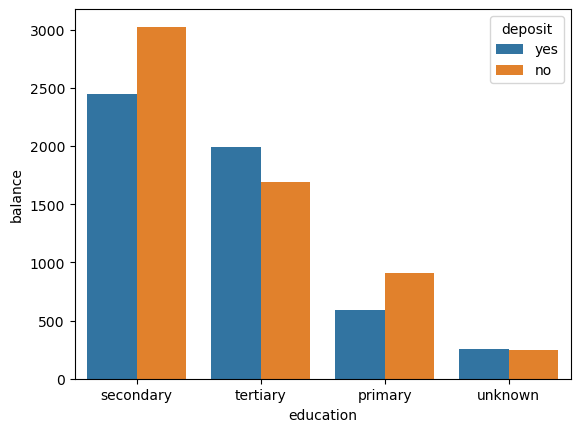

In [157]:
sns.barplot(x="education", y="balance", hue="deposit", data=df, estimator=len)
plt.xticks(rotation=0)
plt.show()

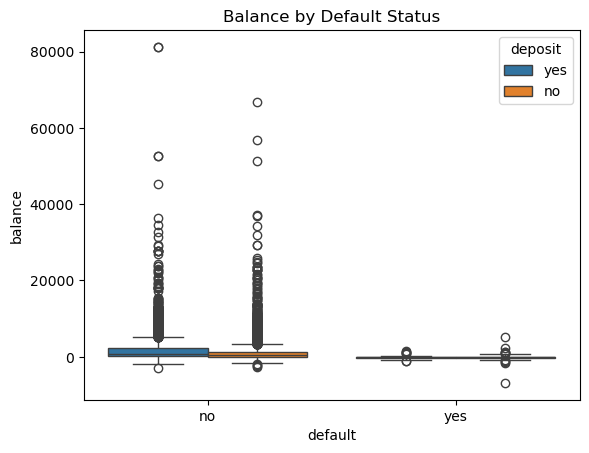

In [158]:
sns.boxplot(x="default", y="balance", hue="deposit", data=df)
plt.title("Balance by Default Status")
plt.show()

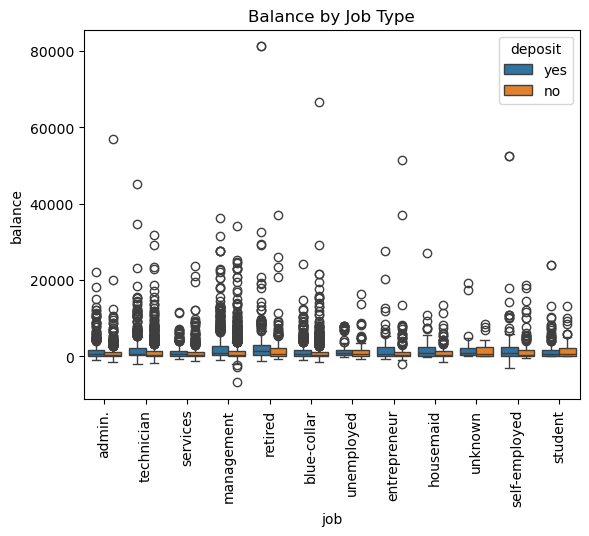

In [159]:
sns.boxplot(x="job", y="balance", hue="deposit", data=df)
plt.xticks(rotation=90)  
plt.title("Balance by Job Type")
plt.show()

#### This suggests that a small number of individuals hold exceptionally high balances.
#### Customers with higher balances may be more likely to subscribe to the term deposit.

In [161]:
df['job'].value_counts(normalize=True)

job
management       0.229887
blue-collar      0.174162
technician       0.163322
admin.           0.119513
services         0.082691
retired          0.069701
self-employed    0.036284
student          0.032252
unemployed       0.031984
entrepreneur     0.029385
housemaid        0.024548
unknown          0.006271
Name: proportion, dtype: float64

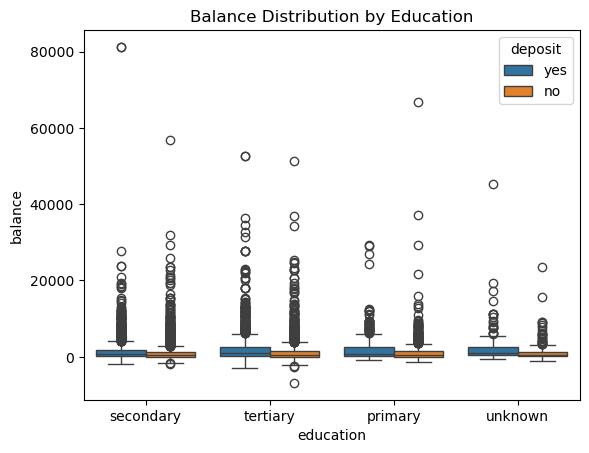

In [162]:
sns.boxplot(x="education", y="balance", hue="deposit", data=df)
plt.title("Balance Distribution by Education")
plt.show()

In [163]:
subscribed_df = df[df["deposit"] == "yes"]

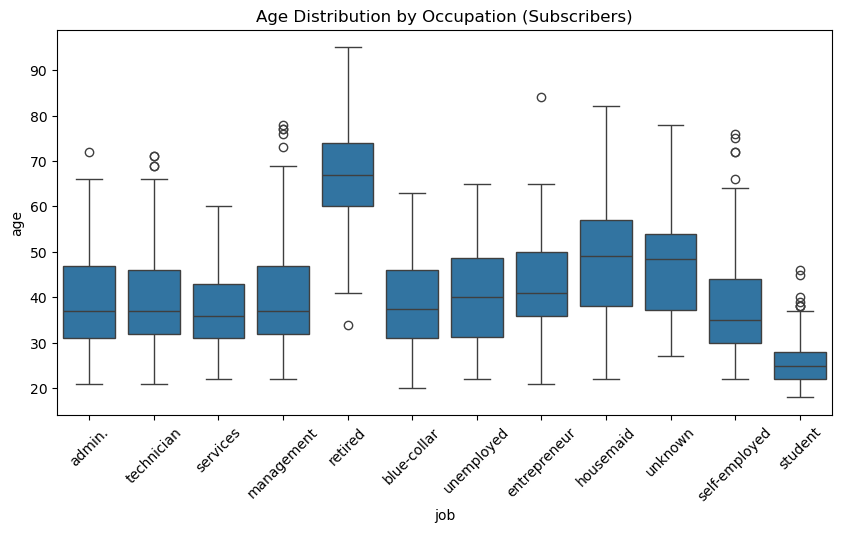

In [164]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="job", y="age", data=subscribed_df)
plt.title("Age Distribution by Occupation (Subscribers)")
plt.xticks(rotation=45)
plt.show()

In [165]:
df['marital'].value_counts()

marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64

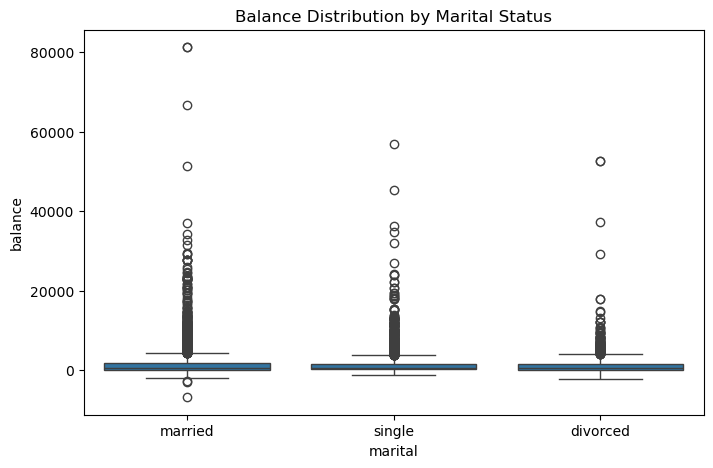

In [166]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="marital", y="balance", data=df)
plt.title("Balance Distribution by Marital Status")
plt.show()

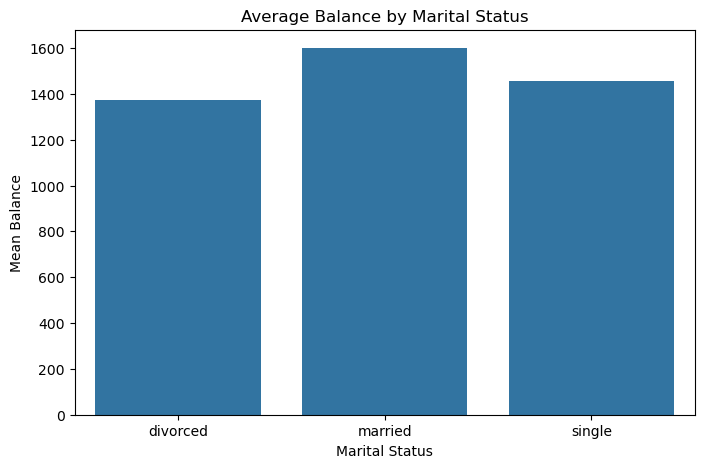

In [167]:
mean_balance = df.groupby("marital")["balance"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x="marital", y="balance", data=mean_balance)

plt.title("Average Balance by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Mean Balance")
plt.show()

##### the divorced people has low avg balance

In [169]:
df['education'].value_counts(normalize=True)

education
secondary    0.490593
tertiary     0.330496
primary      0.134385
unknown      0.044526
Name: proportion, dtype: float64

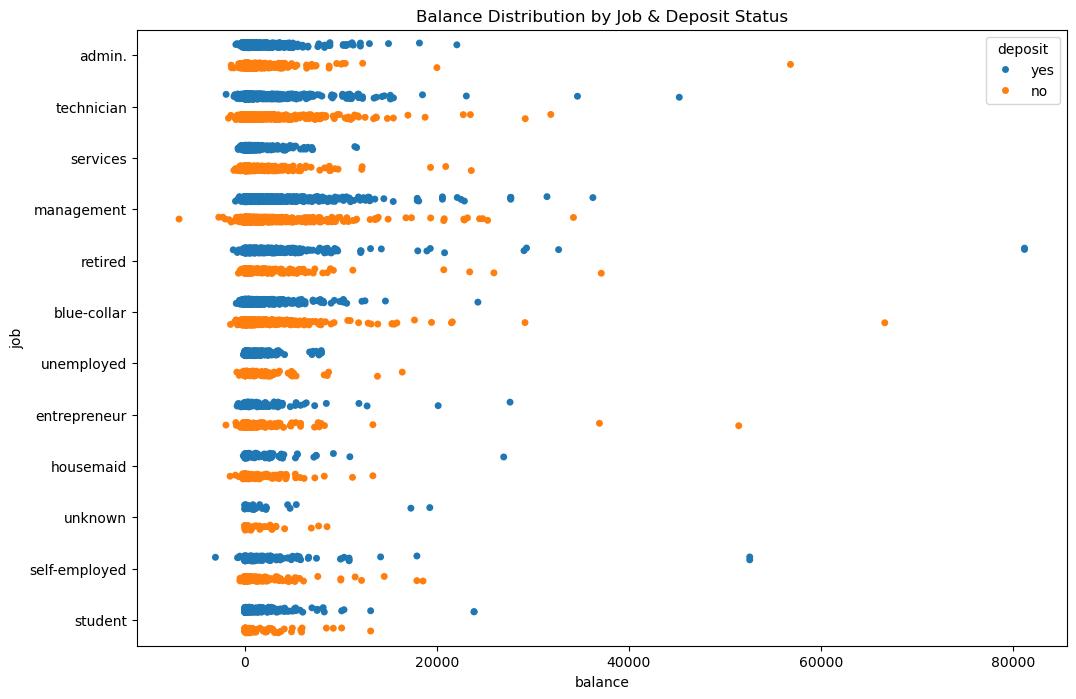

In [170]:
plt.figure(figsize=(12, 8))
sns.stripplot(x="balance", y="job", hue="deposit", data=df, jitter=True, dodge=True)
plt.title("Balance Distribution by Job & Deposit Status")
plt.show()

In [171]:
df['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})

In [172]:
a=df.corr(numeric_only=True)

<Axes: >

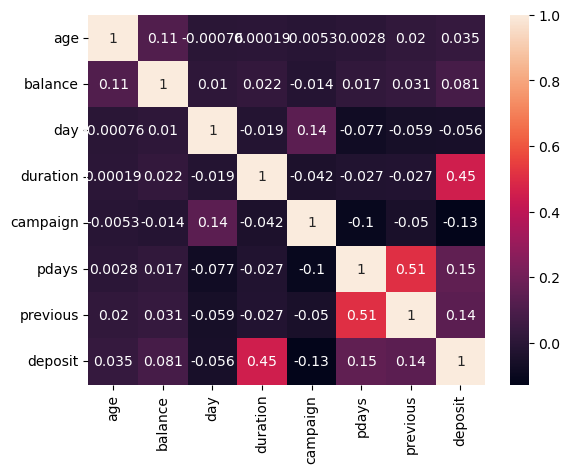

In [173]:
sns.heatmap(a,annot=True)

#### As we can see that there is a positive correlation between duration and deposit

In [175]:
avg_duration = df['duration'].mean()
print(f"Average Call Duration: {avg_duration:.2f} seconds")


Average Call Duration: 371.99 seconds


In [176]:
crosstab_result = pd.crosstab(
    df['duration'].apply(lambda x: 'Above Avg' if x > avg_duration else 'Below Avg'),
    df['deposit'], normalize='index') * 100

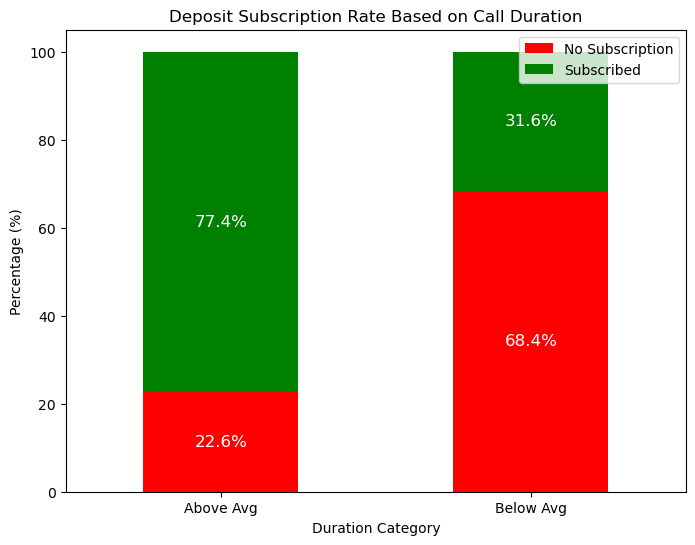

In [177]:
ax = crosstab_result.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(8,6))

plt.title("Deposit Subscription Rate Based on Call Duration")
plt.xlabel("Duration Category")
plt.ylabel("Percentage (%)")
plt.legend(["No Subscription", "Subscribed"], loc="upper right")
plt.xticks(rotation=0)


for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f%%', label_type='center', color='white', fontsize=12)

plt.show()

In [178]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1


In [179]:
for cols in df.columns:
    if df[cols].dtype=='object':
        print(cols)
        print(df[cols].value_counts())
        print('\n')

job
job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64


marital
marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64


education
education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64


default
default
no     10994
yes      168
Name: count, dtype: int64


housing
housing
no     5881
yes    5281
Name: count, dtype: int64


loan
loan
no     9702
yes    1460
Name: count, dtype: int64


contact
contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64


month
month
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: count, dtype: int64


pou

In [180]:
def fill_unknown_job(education, contact, marital):
    ### job based on education, contact method, and marital status
    
    if education == "tertiary":
        return "management"  # Most tertiary holders are in management/self-employed.
    
    if education == "primary":
        return "blue-collar"  # Primary education is common in blue-collar jobs.
    
    if contact == "telephone":
        return "retired"  # Telephone users are mostly retired/unemployed.
    
    if marital == "single" and education == "secondary":
        return "student"  # Young single people with secondary education are likely students.
    
    return "management"  # Default to most common job.

In [181]:
df["job"] = df.apply(lambda row: fill_unknown_job(row["education"], row["contact"], row["marital"]) 
                     if row["job"] == "unknown" else row["job"], axis=1)

In [182]:
df['job'].value_counts()

job
management       2615
blue-collar      1951
technician       1823
admin.           1334
services          923
retired           788
self-employed     405
student           364
unemployed        357
entrepreneur      328
housemaid         274
Name: count, dtype: int64

In [183]:
def fill_unknown_education(job, contact, marital):
    """Fills education based on job role, contact method, and marital status."""
    
    if job in ["management", "self-employed", "entrepreneur"]:
        return "tertiary"  # Higher likelihood of tertiary education
    
    if job in ["technician", "admin.", "services"]:
        return "secondary"  # Mid-level jobs mostly have secondary education
    
    if job in ["blue-collar", "housemaid"]:
        return "primary"  # These jobs generally require primary education
    
    if job in ["retired", "unemployed"]:
        return "secondary"  # Default assumption
    
    if job == "student":
        return "secondary"  # Most students have secondary education
    
    return "secondary"  # Default to mode (secondary)

In [184]:
df["education"] = df.apply(lambda row: fill_unknown_education(row["job"], row["contact"], row["marital"]) 
                           if row["education"] == "unknown" else row["education"], axis=1)

In [185]:
df["education"].value_counts()

education
secondary    5738
tertiary     3829
primary      1595
Name: count, dtype: int64

In [186]:
def fill_unknown_contact(job, education, marital):
    """Fills contact method based on job role, education, and marital status."""
    
    if job in ["retired", "unemployed"]:
        return "telephone"  # Older individuals often use telephone
    
    if job in ["management", "technician", "admin.", "services", "self-employed", "entrepreneur"]:
        return "cellular"  # These jobs require more phone access
    
    if job == "student":
        return "cellular"  # Students mainly use mobile phones
    
    if education == "primary":
        return "telephone"  # Lower education level may indicate less mobile usage
    
    if marital == "single":
        return "cellular"  # Younger single people tend to use mobile phones
    
    return "cellular"  # Default to the most common contact type

In [187]:
df["contact"] = df.apply(lambda row: fill_unknown_contact(row["job"], row["education"], row["marital"]) 
                         if row["contact"] == "unknown" else row["contact"], axis=1)

In [188]:
df['contact'].value_counts()

contact
cellular     9908
telephone    1254
Name: count, dtype: int64

In [189]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,cellular,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,cellular,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,cellular,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,cellular,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,cellular,5,may,673,2,-1,0,unknown,1


In [235]:
# Define categorical and numerical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [237]:
# Separate features and target
X = df.drop(columns=['deposit']) 
y = df['deposit']

In [239]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: deposit, dtype: int64

In [243]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define transformations
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
    ('scaler', StandardScaler(), numerical_cols)
])


In [245]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=330,
    min_samples_split=5,  # Increase to avoid small splits
    min_samples_leaf=5,  # Prevent tiny leaf nodes
    max_depth=20,  # Limit depth to prevent overfitting
    max_features='sqrt',
    class_weight='balanced_subsample',
    bootstrap=False,
    random_state=2
)



In [247]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Create pipeline with SMOTE
pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),  # Oversampling minority class
    ('classifier', rf_model)
])


In [249]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [251]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: deposit, dtype: int64

In [253]:
# Train pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome']),
                                                 ('scaler', StandardScaler(),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(bootstrap=False,
                                        class_weight='balanced_subsample',
                                        max_depth=20, min_samples_leaf=5,
                                        min_samples_split=5, n_estimators=330,
                                        random_state=2))])

In [255]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8428123600537394
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84      1175
           1       0.81      0.88      0.84      1058

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.85      0.84      0.84      2233



In [257]:
pipeline.score(X_train, y_train)

0.9218277522678912

In [259]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline  # Use Imbalanced Pipeline
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [261]:
# Define models and hyperparameters
models = {
    "Logistic Regression": {
        "model": LogisticRegression(),
        "params": {
            "classifier__C": [0.01, 0.1, 1, 10, 100],  # Regularization strength
            "classifier__solver": ['liblinear', 'lbfgs']
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(),
        "params": {
            "classifier__max_depth": [5, 10, 20, None],
            "classifier__min_samples_split": [2, 5, 10],
            "classifier__min_samples_leaf": [1, 3, 5]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
            "classifier__n_estimators": [100, 300, 500],
            "classifier__max_depth": [10, 20, None],
            "classifier__min_samples_split": [2, 5, 10],
            "classifier__min_samples_leaf": [1, 3, 5]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        "params": {
            "classifier__n_estimators": [100, 300, 500],
            "classifier__max_depth": [5, 10, 20],
            "classifier__learning_rate": [0.01, 0.1, 0.2],
            "classifier__subsample": [0.8, 1.0]
        }
    }
}

In [263]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: deposit, dtype: int64

In [265]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

best_models = {}

In [273]:
# Loop through each model, train and tune
for name, config in models.items():
     # Define pipeline with SMOTE for class imbalance
    pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),  # Apply oversampling
        ('classifier', config["model"])
    ])
    # Perform GridSearch for hyperparameter tuning
    grid_search = GridSearchCV(pipeline, config["params"], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Store the best model
    best_models[name] = grid_search.best_estimator_
    
    # Print best parameters
    print(f"Best Parameters for {name}: {grid_search.best_params_}")
    print(f"Best Training Accuracy for {name}: {grid_search.best_score_:.4f}")

Best Parameters for Logistic Regression: {'classifier__C': 0.1, 'classifier__solver': 'liblinear'}
Best Training Accuracy for Logistic Regression: 0.8187
Best Parameters for Decision Tree: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Best Training Accuracy for Decision Tree: 0.8049
Best Parameters for Random Forest: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 500}
Best Training Accuracy for Random Forest: 0.8446


C:\Users\pavan\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:13:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for XGBoost: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 300, 'classifier__subsample': 0.8}
Best Training Accuracy for XGBoost: 0.8516


In [275]:
from sklearn.metrics import accuracy_score, classification_report

print("\n Model Performance on Test Data:")
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"\n{name}:")
    print(f" Test Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))



 Model Performance on Test Data:

Logistic Regression:
 Test Accuracy: 0.8173
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1175
           1       0.82      0.79      0.80      1058

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233


Decision Tree:
 Test Accuracy: 0.8030
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1175
           1       0.78      0.82      0.80      1058

    accuracy                           0.80      2233
   macro avg       0.80      0.80      0.80      2233
weighted avg       0.80      0.80      0.80      2233


Random Forest:
 Test Accuracy: 0.8410
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1175
           1       0.80      0.88      0.84      1058

    accuracy             

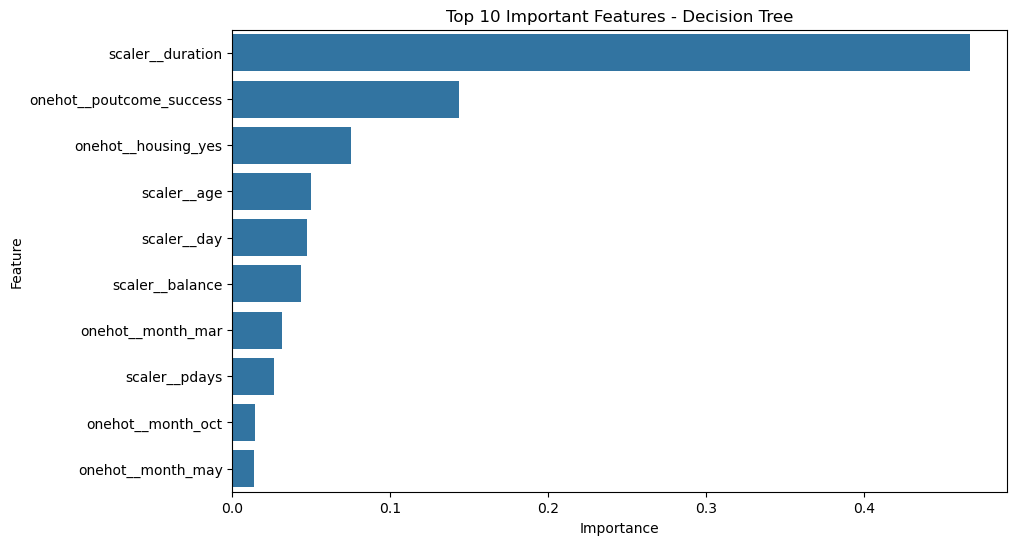

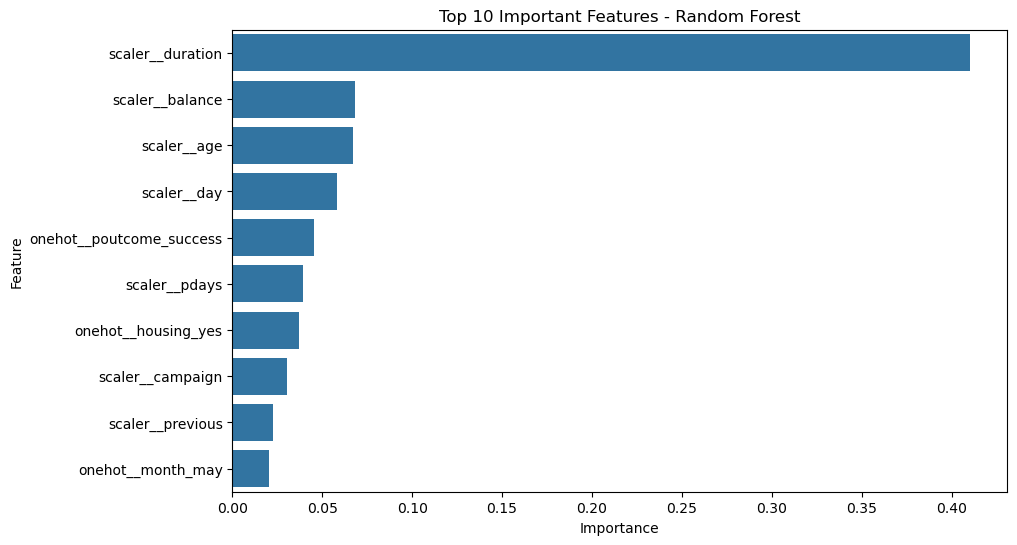

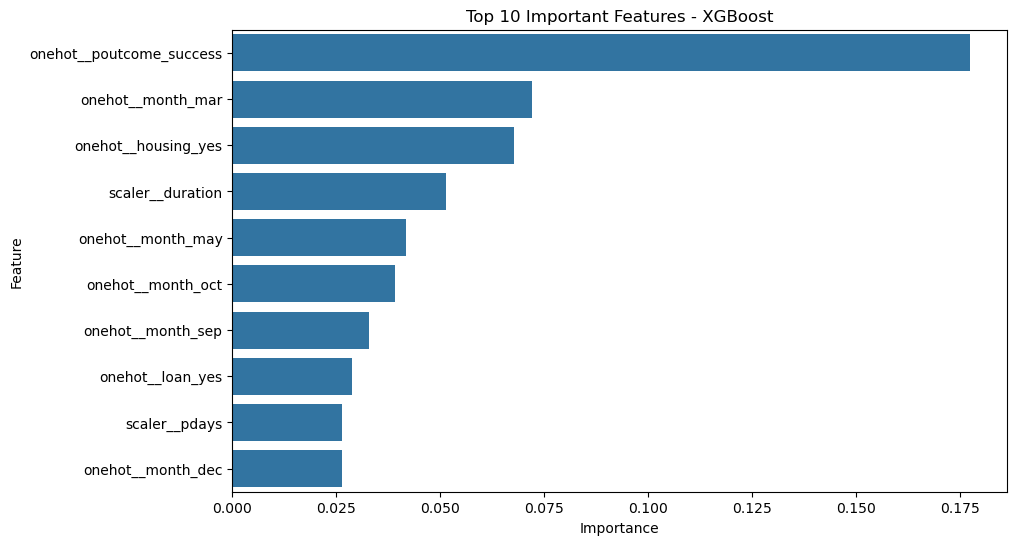

In [277]:
# Get feature names after preprocessing
feature_names = best_models["Random Forest"].named_steps["preprocessor"].get_feature_names_out()

# Loop through tree-based models
for name in ["Decision Tree", "Random Forest", "XGBoost"]:
    model = best_models[name].named_steps["classifier"]  # Extract model
    
    if hasattr(model, "feature_importances_"):
        feature_importance = model.feature_importances_
        
        # Ensure length matches
        if len(feature_names) != len(feature_importance):
            print(f"Length Mismatch in {name}: Features({len(feature_names)}) vs Importances({len(feature_importance)})")
            continue  # Skip model if mismatch

        # Create DataFrame
        feat_imp_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
        feat_imp_df = feat_imp_df.sort_values(by="Importance", ascending=False)

        # Plot Feature Importance
        plt.figure(figsize=(10,6))
        sns.barplot(x="Importance", y="Feature", data=feat_imp_df[:10])  # Top 10 features
        plt.title(f"Top 10 Important Features - {name}")
        plt.show()

<Figure size 600x600 with 0 Axes>

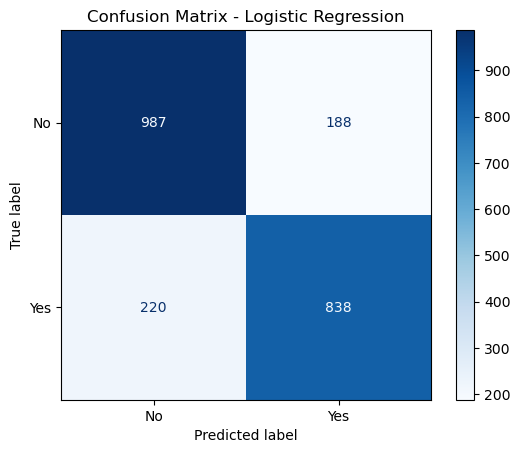

<Figure size 600x600 with 0 Axes>

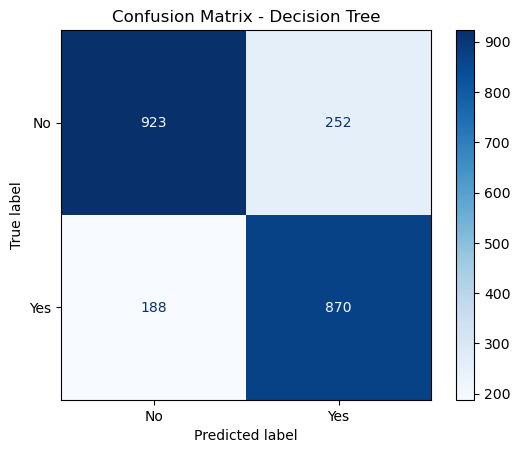

<Figure size 600x600 with 0 Axes>

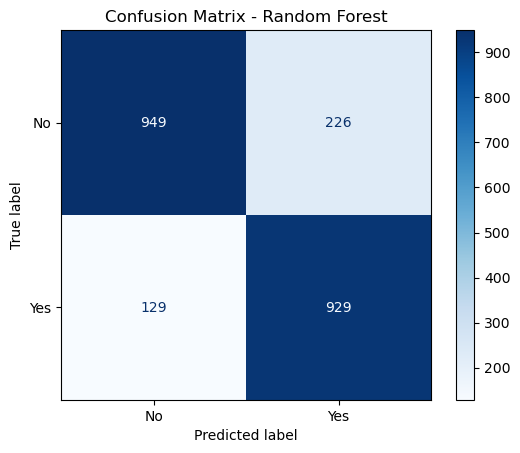

<Figure size 600x600 with 0 Axes>

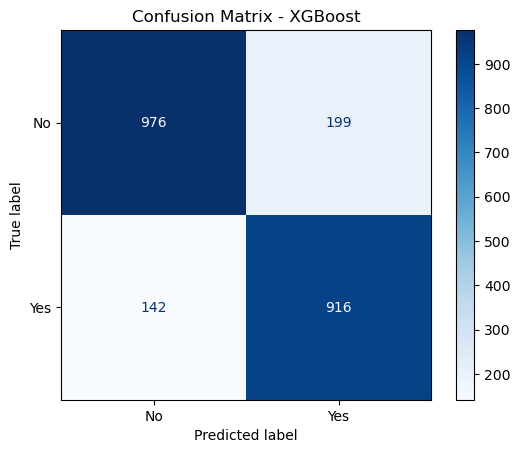

In [279]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for name, pipeline in best_models.items():
    model = pipeline.named_steps["classifier"]
    y_pred = pipeline.predict(X_test)  # Use pipeline to include preprocessing

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
    
    plt.figure(figsize=(6,6))
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

In [281]:
print(X_train.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')


In [283]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()


In [285]:
low_importance_features = ['month', 'loan', 'pdays']  

X_train_copy.drop(columns=low_importance_features, errors='ignore', inplace=True)
X_test_copy.drop(columns=low_importance_features, errors='ignore', inplace=True)



In [287]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
import pandas as pd

# Extract preprocessing from the existing pipeline
preprocessor = best_models["XGBoost"].named_steps["preprocessor"]

# Transform training and test data using the fitted preprocessor
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Get feature names after OneHotEncoding
feature_names = preprocessor.get_feature_names_out()

# Convert transformed data to DataFrame
X_train_transformed = pd.DataFrame(X_train_transformed, columns=feature_names)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=feature_names)

# Define XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [500, 700], 
    'max_depth': [3, 4],  
    'learning_rate': [0.05, 0.1],  
    'subsample': [0.8, 0.9],  
    'colsample_bytree': [0.8, 0.9],  
    'reg_lambda': [1, 5, 10],  
    'reg_alpha': [0, 1, 5]
}

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search with StratifiedKFold CV
grid_search = GridSearchCV(xgb, param_grid, scoring='accuracy', cv=cv, n_jobs=-1, verbose=2)
grid_search.fit(X_train_transformed, y_train)

# Get Best Parameters
best_xgb_params = grid_search.best_params_
print(" Best XGBoost Parameters:", best_xgb_params)

# Train Final XGBoost Model with Best Parameters
best_xgb = XGBClassifier(**best_xgb_params, use_label_encoder=False, eval_metric='logloss', random_state=42)
best_xgb.fit(X_train_transformed, y_train)

# Evaluate Test Accuracy
train_acc = best_xgb.score(X_train_transformed, y_train)
test_acc = best_xgb.score(X_test_transformed, y_test)

print(f"Final XGBoost Training Accuracy: {train_acc:.4f}")
print(f" Final XGBoost Test Accuracy: {test_acc:.4f}")


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


C:\Users\pavan\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:23:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


 Best XGBoost Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 500, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 0.9}


C:\Users\pavan\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:23:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Final XGBoost Training Accuracy: 0.8891
 Final XGBoost Test Accuracy: 0.8527


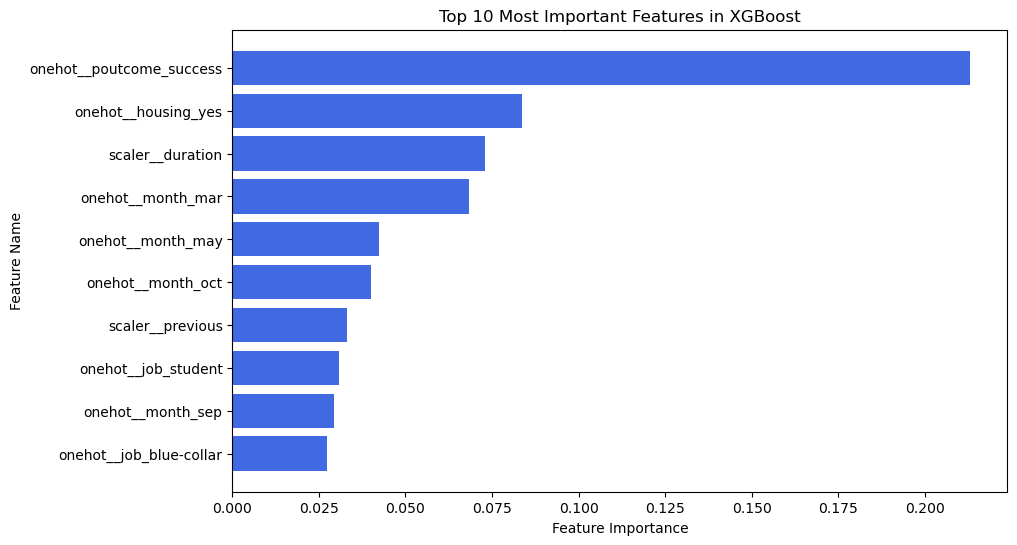

Low Importance Features to Consider Removing: ['onehot__job_retired']


In [289]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
feature_importances = best_xgb.feature_importances_

# Sort features by importance
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = np.array(X_train_transformed.columns)[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_features[:10], sorted_importances[:10], color='royalblue')  # Top 10 features
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Top 10 Most Important Features in XGBoost")
plt.gca().invert_yaxis()
plt.show()

# Identify least important features (threshold example: < 0.005)
low_importance_features = sorted_features[sorted_importances < 0.005]
print("Low Importance Features to Consider Removing:", low_importance_features)


In [291]:
import pandas as pd
import numpy as np

# Get feature importances
feature_importances = best_xgb.feature_importances_

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    "Feature": X_train_transformed.columns, 
    "Importance": feature_importances
})

# Sort by importance (ascending)
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=True)

# Display the least important features
print(feature_importance_df.head(10))  # Check the lowest 10 features


                        Feature  Importance
4           onehot__job_retired    0.004598
6          onehot__job_services    0.005031
9        onehot__job_unemployed    0.005070
2         onehot__job_housemaid    0.005841
1      onehot__job_entrepreneur    0.005847
3        onehot__job_management    0.006301
8        onehot__job_technician    0.006306
29       onehot__poutcome_other    0.007122
12  onehot__education_secondary    0.007409
10      onehot__marital_married    0.008239


In [293]:
# List of low-importance features to drop
low_importance_features = [
    "onehot__job_retired", "onehot__job_services", "onehot__job_unemployed",
    "onehot__job_housemaid", "onehot__job_entrepreneur", "onehot__job_management",
    "onehot__job_technician", "onehot__poutcome_other", "onehot__education_secondary",
    "onehot__marital_married"
]

# Drop these features from training and test sets
X_train_filtered = X_train_transformed.drop(columns=low_importance_features, errors="ignore")
X_test_filtered = X_test_transformed.drop(columns=low_importance_features, errors="ignore")

print("Features removed:", low_importance_features)
print("New shape of X_train:", X_train_filtered.shape)
print("New shape of X_test:", X_test_filtered.shape)


Features removed: ['onehot__job_retired', 'onehot__job_services', 'onehot__job_unemployed', 'onehot__job_housemaid', 'onehot__job_entrepreneur', 'onehot__job_management', 'onehot__job_technician', 'onehot__poutcome_other', 'onehot__education_secondary', 'onehot__marital_married']
New shape of X_train: (8929, 29)
New shape of X_test: (2233, 29)


In [295]:
# Train model again with filtered features
best_xgb.fit(X_train_filtered, y_train)

# Evaluate new accuracy
filtered_train_acc = best_xgb.score(X_train_filtered, y_train)
filtered_test_acc = best_xgb.score(X_test_filtered, y_test)

print(f"Training Accuracy after feature removal: {filtered_train_acc:.4f}")
print(f"Test Accuracy after feature removal: {filtered_test_acc:.4f}")


C:\Users\pavan\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:23:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Accuracy after feature removal: 0.8851
Test Accuracy after feature removal: 0.8518


In [297]:
param_grid = {
    'n_estimators': [ 500, 600],  # Fine-tune around best value
    'max_depth': [3, 4],  # Reduce complexity
    'learning_rate': [0.03, 0.05],  # Smaller learning rate
    'subsample': [0.8, 0.9],  
    'colsample_bytree': [0.7, 0.8],  
    'reg_lambda': [1, 3, 5],  
    'reg_alpha': [0, 1, 3]
}

grid_search = GridSearchCV(xgb, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_filtered, y_train)
print("New Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


C:\Users\pavan\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:30:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


New Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 600, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 0.9}


In [299]:
from xgboost import XGBClassifier

# Train final XGBoost model
best_xgb_final = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.05,
    max_depth=4,
    n_estimators=600,
    reg_alpha=1,
    reg_lambda=1,
    subsample=0.9,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

best_xgb_final.fit(X_train_filtered, y_train)

# Evaluate final model
final_train_acc = best_xgb_final.score(X_train_filtered, y_train)
final_test_acc = best_xgb_final.score(X_test_filtered, y_test)

print(f"Final XGBoost Training Accuracy: {final_train_acc:.4f}")
print(f"Final XGBoost Test Accuracy: {final_test_acc:.4f}")


C:\Users\pavan\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:31:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Final XGBoost Training Accuracy: 0.8929
Final XGBoost Test Accuracy: 0.8509


In [303]:
y_test_pred = best_models[name].predict(X_test)

In [305]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n", class_report)


Confusion Matrix:
 [[976 199]
 [142 916]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      1175
           1       0.82      0.87      0.84      1058

    accuracy                           0.85      2233
   macro avg       0.85      0.85      0.85      2233
weighted avg       0.85      0.85      0.85      2233



In [307]:

data["deposit"] = data["deposit"].map({"yes": 1, "no": 0}).astype(int)


In [309]:
X = data.drop(columns=["deposit"])  
y = data["deposit"]

In [311]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [313]:
# Identify Categorical and Numerical Features
cat_features = ["job", "marital", "education", "default", "housing", "contact", "poutcome","month", "loan"]
num_features = ["age", "balance", "duration", "campaign", "previous", "pdays"]

In [315]:
# Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(handle_unknown="ignore"), cat_features),
        ("scaler", StandardScaler(), num_features)
    ]
)

In [317]:
# XGBoost Model with Best Parameters
xgb_model = XGBClassifier(
    colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=600,
    reg_alpha=1, reg_lambda=1, subsample=0.9, use_label_encoder=False, eval_metric="logloss", random_state=42
)

In [319]:
# Full Pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", xgb_model)
])

In [321]:
# Train Pipeline
pipeline.fit(X_train, y_train)

C:\Users\pavan\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:33:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'contact',
                                                   'poutcome', 'month',
                                                   'loan']),
                                                 ('scaler', StandardScaler(),
                                                  ['age', 'balance', 'duration',
                                                   'campaign', 'previous',
                                                   'pdays'])])),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callback...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=600, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [323]:
# Predictions
y_pred = pipeline.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print Results
print(f"Final XGBoost Test Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Final XGBoost Test Accuracy: 0.8562

Confusion Matrix:
 [[982 193]
 [128 930]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      1175
           1       0.83      0.88      0.85      1058

    accuracy                           0.86      2233
   macro avg       0.86      0.86      0.86      2233
weighted avg       0.86      0.86      0.86      2233



In [327]:
# Predict on training set
y_train_pred = pipeline.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print training accuracy
print(f"Final XGBoost Training Accuracy: {train_accuracy:.4f}")


Final XGBoost Training Accuracy: 0.8854


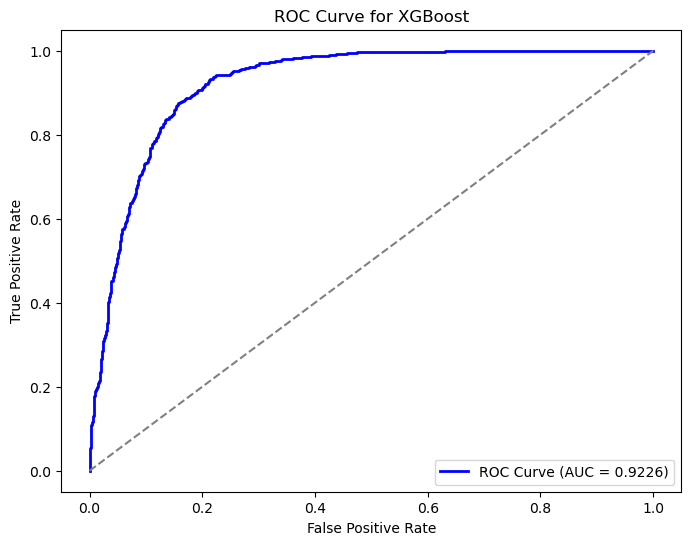

Test AUC Score: 0.9226


In [325]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class (label=1)
y_test_proba = pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for XGBoost")
plt.legend(loc="lower right")
plt.show()

# Print AUC score
print(f"Test AUC Score: {roc_auc:.4f}")


In [170]:
import pickle

# Save the entire pipeline
with open("xgboost_pipeline.pkl", "wb") as model_file:
    pickle.dump(pipeline, model_file)

print("Model saved successfully!")


Model saved successfully!


In [172]:
import pickle

# Load the saved model
with open("xgboost_pipeline.pkl", "rb") as model_file:
    loaded_pipeline = pickle.load(model_file)

print(" Model loaded successfully!")

# Make predictions on new data
new_predictions = loaded_pipeline.predict(X_test)

print("Predictions:", new_predictions[:10])  # Print first 10 predictions


 Model loaded successfully!
Predictions: [1 1 1 0 1 0 0 0 1 1]


In [176]:
# Example new data (should match training features)
import pandas as pd

new_data = pd.DataFrame({
    "age": [35], 
    "job": ["admin."], 
    "marital": ["married"], 
    "education": ["tertiary"],
    "default": ["no"], 
    "balance": [1500], 
    "housing": ["yes"],
    "loan": ["no"], 
    "contact": ["cellular"], 
    "day": [15], 
    "month": ["aug"], 
    "duration": [400], 
    "campaign": [2], 
    "pdays": [-1], 
    "previous": [0], 
    "poutcome": ["unknown"]
})

# Predict whether the customer will subscribe to a term deposit
new_prediction = loaded_pipeline.predict(new_data)

print(" New Prediction:", new_prediction[0])  # Output: "yes" or "no"


 New Prediction: 1
